In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
path="../Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{path}")

In [12]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session=Session(bind=engine)

In [17]:
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20be8099060>,
 'station': 'USC00519397',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [18]:
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20bf07e8850>,
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
data=session.query(Measurement).order_by(Measurement.date.desc()).first()

data.date


'2017-08-23'

In [38]:
query_date2 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [39]:
query_date1=dt.date(2017,8,23)
query_date1

datetime.date(2017, 8, 23)

In [108]:
sel=[Measurement.prcp,Measurement.date]
data2=session.query(*sel).filter(Measurement.date >=query_date2).filter(Measurement.date<=query_date1).order_by(Measurement.date).all()



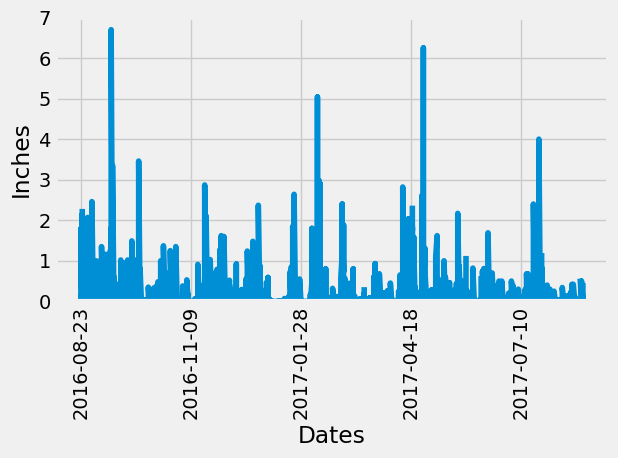

In [104]:
df = pd.DataFrame(data2, columns=['prcp', 'date'])
df.set_index('date', inplace=True)

plt.plot(df.index,df["prcp"])
plt.xlabel("Dates")
plt.ylabel("Inches")
x_axis = np.arange(0,400,step=80)

tick_location=[value for value in x_axis]

plt.xticks(tick_location,['2016-08-23', '2016-11-09', '2017-01-28','2017-04-18', '2017-07-10'],rotation=90)

plt.ylim(0,7)


plt.tight_layout()
plt.show()





In [107]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [111]:
# Design a query to calculate the total number of stations in the dataset
station_num=session.query(Measurement.station).distinct().count()
station_num

9

In [127]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

busy_station=session.query(*sel).filter(Measurement.station=="USC00519281").all()

busy_station

[(54.0, 85.0, 71.66378066378067)]

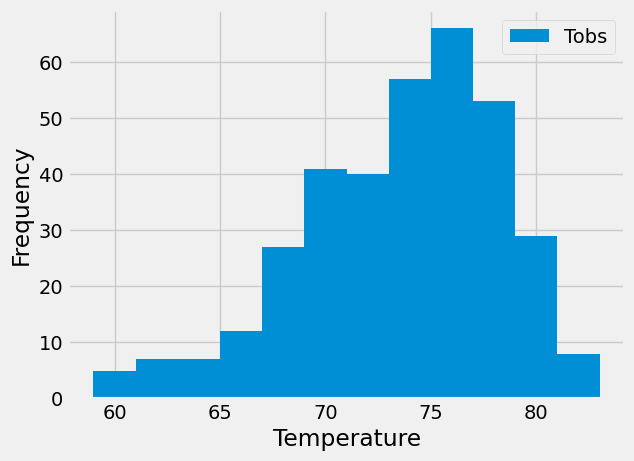

In [136]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel=[Measurement.tobs]
high_frequency=session.query(*sel).filter(Measurement.station=="USC00519281").filter(Measurement.date >=query_date2).filter(Measurement.date<=query_date1).all()

df1 = pd.DataFrame(high_frequency, columns=['Tobs'])
df1.head()
df1.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [137]:
# Close Session
session.close()